# Real Time Facial Expression Recognition

## Description
Computer animated agents and robots bring new dimension in human computer interaction which makes it vital as how computers can affect our social life in day-to-day activities. Face to face communication is a real-time process operating at a a time scale in the order of milliseconds. The level of uncertainty at this time scale is considerable, making it necessary for humans and machines to rely on sensory rich perceptual primitives rather than slow symbolic inference processes.<br><br>
In this project we are presenting the real time facial expression recognition of seven most basic human expressions: ANGER, DISGUST, FEAR, HAPPY, NEUTRAL SAD, SURPRISE.<br><br>
This model can be used for prediction of expressions of both still images and real time video. However, in both the cases we have to provide image to the model. In case of real time video the image should be taken at any point in time and feed it to the model for prediction of expression. The system automatically detects face using HAAR cascade then its crops it and resize the image to a specific size and give it to the model for prediction. The model will generate seven probability values corresponding to seven expressions. The highest probability value to the corresponding expression will be the predicted expression for that image.<br><br>

## Business Problem
However, our goal here is to predict the human expressions, but we have trained our model on both human and animated images. Since, we had only approx 1500 human images which are very less to make a good model, so we took approximately 9000 animated images and leverage those animated images for training the model and ultimately do the prediction of expressions on human images.<br><br> 
For better prediction we have decided to keep the size of each image <b>350$*$350</b>.<br><br>
<b>For any image our goal is to predict the expression of the face in that image out of seven basic human expression</b>

## Problem Statement
<br>
<B>CLASSIFY THE EXPRESSION OF FACE IN IMAGE OUT OF SEVEN BASIC HUMAN EXPRESSION</B>

## Performance Metric
This is a multi-class classification problem with 7 different classes, so we have considered three performance metrics:<br>
1. Multi-Class Log-loss
2. Accuracy
3. Confusion Metric

## Source Data
We have downloaded data from 4 different sources.<br>
1. Human Images Source-1: http://www.consortium.ri.cmu.edu/ckagree/
2. Human Images Source-2: http://app.visgraf.impa.br/database/faces/
3. Human Images Source-3: http://www.kasrl.org/jaffe.html
4. Animated Images Source: https://grail.cs.washington.edu/projects/deepexpr/ferg-db.html

## Real-World Business Objective & Constraints
1. Low-latency is required.
2. Interpretability is important for still images but not in real time. For still images, probability of predicted expressions can be given.
3. Errors are not costly.

## Y- Encoded Labels
__Angry--1__<br>
__Disgust --2__<br>
__Fear--3__<br>
__Happy--4__<br>
__Neutral--5__<br>
__Sad--6__<br>
__Surprise--7__

## Mapping real-world to ML Problem

In [2]:
import warnings 
warnings.filterwarnings("ignore") 

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.applications import VGG16
from sklearn.metrics import accuracy_score, confusion_matrix

## 1. Reading the Data of Human Images

### Angry

In [40]:
human_angry = glob.glob("../Data/Human/Angry/*")
human_angry.remove('../Data/Human/Angry\\Thumbs.db')
print("Number of images in Angry emotion = "+str(len(human_angry)))

Number of images in Angry emotion = 168


In [84]:
human_angry_folderName = [str(i.split("\\")[0])+"/" for i in human_angry]
human_angry_imageName = [str(i.split("\\")[1]) for i in human_angry]
human_angry_emotion = [["Angry"]*len(human_angry)][0]
human_angry_label = [1]*len(human_angry)

len(human_angry_folderName), len(human_angry_imageName), len(human_angry_emotion), len(human_angry_label)

(168, 168, 168, 168)

In [86]:
df_angry = pd.DataFrame()
df_angry["folderName"] = human_angry_folderName
df_angry["imageName"] = human_angry_imageName
df_angry["Emotion"] = human_angry_emotion
df_angry["Labels"] = human_angry_label
df_angry.head()

folderName        imageName Emotion  Labels
0  ../Data/Human/Angry/   KA.AN1.39.tiff   Angry       1
1  ../Data/Human/Angry/   KA.AN2.40.tiff   Angry       1
2  ../Data/Human/Angry/   KA.AN3.41.tiff   Angry       1
3  ../Data/Human/Angry/  KL.AN1.167.tiff   Angry       1
4  ../Data/Human/Angry/  KL.AN2.168.tiff   Angry       1

### Disgust

In [87]:
human_disgust = glob.glob("../Data/Human/Disgust/*")
human_disgust.remove('../Data/Human/Disgust\\Thumbs.db')
print("Number of images in Disgust emotion = "+str(len(human_disgust)))

Number of images in Disgust emotion = 221


In [88]:
human_disgust_folderName = [str(i.split("\\")[0])+"/" for i in human_disgust]
human_disgust_imageName = [str(i.split("\\")[1]) for i in human_disgust]
human_disgust_emotion = [["Disgust"]*len(human_disgust)][0]
human_disgust_label = [2]*len(human_disgust)

len(human_disgust_folderName), len(human_disgust_imageName), len(human_disgust_emotion), len(human_disgust_label)

(221, 221, 221, 221)

In [89]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = human_disgust_folderName
df_disgust["imageName"] = human_disgust_imageName
df_disgust["Emotion"] = human_disgust_emotion
df_disgust["Labels"] = human_disgust_label
df_disgust.head()

folderName        imageName  Emotion  Labels
0  ../Data/Human/Disgust/   KA.DI1.42.tiff  Disgust       2
1  ../Data/Human/Disgust/   KA.DI2.43.tiff  Disgust       2
2  ../Data/Human/Disgust/   KA.DI3.44.tiff  Disgust       2
3  ../Data/Human/Disgust/  KL.DI1.170.tiff  Disgust       2
4  ../Data/Human/Disgust/  KL.DI2.171.tiff  Disgust       2

### Fear

In [117]:
human_fear = glob.glob("../Data/Human/Fear/*")
human_fear.remove('../Data/Human/Fear\\Thumbs.db')
print("Number of images in Fear emotion = "+str(len(human_fear)))

Number of images in Fear emotion = 122


In [118]:
human_fear_folderName = [str(i.split("\\")[0])+"/" for i in human_fear]
human_fear_imageName = [str(i.split("\\")[1]) for i in human_fear]
human_fear_emotion = [["Fear"]*len(human_fear)][0]
human_fear_label = [3]*len(human_fear)

len(human_fear_folderName), len(human_fear_imageName), len(human_fear_emotion), len(human_fear_label)

(122, 122, 122, 122)

In [119]:
df_fear = pd.DataFrame()
df_fear["folderName"] = human_fear_folderName
df_fear["imageName"] = human_fear_imageName
df_fear["Emotion"] = human_fear_emotion
df_fear["Labels"] = human_fear_label
df_fear.head()

folderName        imageName Emotion  Labels
0  ../Data/Human/Fear/   KA.FE3.47.tiff    Fear       3
1  ../Data/Human/Fear/   KA.FE4.48.tiff    Fear       3
2  ../Data/Human/Fear/  KL.FE1.174.tiff    Fear       3
3  ../Data/Human/Fear/  MK.FE1.131.tiff    Fear       3
4  ../Data/Human/Fear/  MK.FE2.132.tiff    Fear       3

### Happy

In [149]:
human_happy = glob.glob("../Data/Human/Happy/*")
human_happy.remove('../Data/Human/Happy\\Thumbs.db')
print("Number of images in Happy emotion = "+str(len(human_happy)))

Number of images in Happy emotion = 280


In [151]:
human_happy_folderName = [str(i.split("\\")[0])+"/" for i in human_happy]
human_happy_imageName = [str(i.split("\\")[1]) for i in human_happy]
human_happy_emotion = [["Happy"]*len(human_happy)][0]
human_happy_label = [4]*len(human_happy)

len(human_happy_folderName), len(human_happy_imageName), len(human_happy_emotion), len(human_happy_label)

(280, 280, 280, 280)

In [153]:
df_happy = pd.DataFrame()
df_happy["folderName"] = human_happy_folderName
df_happy["imageName"] = human_happy_imageName
df_happy["Emotion"] = human_happy_emotion
df_happy["Labels"] = human_happy_label
df_happy.head()

folderName        imageName Emotion  Labels
0  ../Data/Human/Happy/   KA.HA1.29.tiff   Happy       4
1  ../Data/Human/Happy/   KA.HA2.30.tiff   Happy       4
2  ../Data/Human/Happy/   KA.HA3.31.tiff   Happy       4
3  ../Data/Human/Happy/  KL.HA1.158.tiff   Happy       4
4  ../Data/Human/Happy/  KL.HA2.159.tiff   Happy       4

### Neutral

In [154]:
human_neutral = glob.glob("../Data/Human/Neutral/*")
human_neutral.remove('../Data/Human/Neutral\\Thumbs.db')
print("Number of images in Neutral emotion = "+str(len(human_neutral)))

Number of images in Neutral emotion = 270


In [155]:
human_neutral_folderName = [str(i.split("\\")[0])+"/" for i in human_neutral]
human_neutral_imageName = [str(i.split("\\")[1]) for i in human_neutral]
human_neutral_emotion = [["Neutral"]*len(human_neutral)][0]
human_neutral_label = [5]*len(human_neutral)

len(human_neutral_folderName), len(human_neutral_imageName), len(human_neutral_emotion), len(human_neutral_label)

(270, 270, 270, 270)

In [156]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = human_neutral_folderName
df_neutral["imageName"] = human_neutral_imageName
df_neutral["Emotion"] = human_neutral_emotion
df_neutral["Labels"] = human_neutral_label
df_neutral.head()

folderName        imageName  Emotion  Labels
0  ../Data/Human/Neutral/   KA.NE1.26.tiff  Neutral       5
1  ../Data/Human/Neutral/   KA.NE2.27.tiff  Neutral       5
2  ../Data/Human/Neutral/   KA.NE3.28.tiff  Neutral       5
3  ../Data/Human/Neutral/  KL.NE1.155.tiff  Neutral       5
4  ../Data/Human/Neutral/  KL.NE2.156.tiff  Neutral       5

### Sad

In [181]:
human_sad = glob.glob("../Data/Human/Sad/*")
human_sad.remove('../Data/Human/Sad\\Thumbs.db')
print("Number of images in Sad emotion = "+str(len(human_sad)))

Number of images in Sad emotion = 157


In [182]:
human_sad_folderName = [str(i.split("\\")[0])+"/" for i in human_sad]
human_sad_imageName = [str(i.split("\\")[1]) for i in human_sad]
human_sad_emotion = [["Sad"]*len(human_sad)][0]
human_sad_label = [6]*len(human_sad)

len(human_sad_folderName), len(human_sad_imageName), len(human_sad_emotion), len(human_sad_label)

(157, 157, 157, 157)

In [183]:
df_sad = pd.DataFrame()
df_sad["folderName"] = human_sad_folderName
df_sad["imageName"] = human_sad_imageName
df_sad["Emotion"] = human_sad_emotion
df_sad["Labels"] = human_sad_label
df_sad.head()

folderName        imageName Emotion  Labels
0  ../Data/Human/Sad/   KA.SA1.33.tiff     Sad       6
1  ../Data/Human/Sad/   KA.SA2.34.tiff     Sad       6
2  ../Data/Human/Sad/   KA.SA3.35.tiff     Sad       6
3  ../Data/Human/Sad/  KL.SA1.161.tiff     Sad       6
4  ../Data/Human/Sad/  KL.SA2.162.tiff     Sad       6

### Surprise

In [231]:
human_surprise = glob.glob("../Data/Human/Surprise/*")
human_surprise.remove('../Data/Human/Surprise\\Thumbs.db')
print("Number of images in Surprise emotion = "+str(len(human_surprise)))

Number of images in Surprise emotion = 278


In [232]:
human_surprise_folderName = [str(i.split("\\")[0])+"/" for i in human_surprise]
human_surprise_imageName = [str(i.split("\\")[1]) for i in human_surprise]
human_surprise_emotion = [["Surprise"]*len(human_surprise)][0]
human_surprise_label = [7]*len(human_surprise)

len(human_surprise_folderName), len(human_surprise_imageName), len(human_surprise_emotion), len(human_surprise_label)

(278, 278, 278, 278)

In [233]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = human_surprise_folderName
df_surprise["imageName"] = human_surprise_imageName
df_surprise["Emotion"] = human_surprise_emotion
df_surprise["Labels"] = human_surprise_label
df_surprise.head()

folderName        imageName   Emotion  Labels
0  ../Data/Human/Surprise/   KA.SU1.36.tiff  Surprise       7
1  ../Data/Human/Surprise/   KA.SU2.37.tiff  Surprise       7
2  ../Data/Human/Surprise/   KA.SU3.38.tiff  Surprise       7
3  ../Data/Human/Surprise/  KL.SU1.164.tiff  Surprise       7
4  ../Data/Human/Surprise/  KL.SU2.165.tiff  Surprise       7

In [255]:
length = df_angry.shape[0] + df_disgust.shape[0] + df_fear.shape[0] + df_happy.shape[0] + df_neutral.shape[0] + df_sad.shape[0] + df_surprise.shape[0]
print("Total number of images in all the emotions = "+str(length))

Total number of images in all the emotions = 1496


### Concatenating all dataframes

In [256]:
frames = [df_angry, df_disgust, df_fear, df_happy, df_neutral, df_sad, df_surprise]
Final_human = pd.concat(frames)
Final_human.shape

(1496, 4)

In [261]:
Final_human.reset_index(inplace = True, drop = True)
Final_human = Final_human.sample(frac = 1.0)   #shuffling the dataframe
Final_human.reset_index(inplace = True, drop = True)
Final_human.head()

folderName              imageName   Emotion  Labels
0   ../Data/Human/Neutral/  S099_001_00000002.png   Neutral       5
1   ../Data/Human/Neutral/  S103_006_00000002.png   Neutral       5
2  ../Data/Human/Surprise/  S106_001_00000016.png  Surprise       7
3  ../Data/Human/Surprise/        s037-03_img.jpg  Surprise       7
4  ../Data/Human/Surprise/  S022_001_00000028.png  Surprise       7

## 2. Train, CV and Test Split for Human Images

In [307]:
df_human_train_data, df_human_test = train_test_split(Final_human, stratify=Final_human["Labels"], test_size = 0.197860)
df_human_train, df_human_cv = train_test_split(df_human_train_data, stratify=df_human_train_data["Labels"], test_size = 0.166666)
df_human_train.shape, df_human_cv.shape, df_human_test.shape 

((1000, 4), (200, 4), (296, 4))

In [308]:
df_human_train.reset_index(inplace = True, drop = True)
df_human_train.to_pickle("../Data/Dataframes/Human/df_human_train.pkl")

df_human_cv.reset_index(inplace = True, drop = True)
df_human_cv.to_pickle("../Data/Dataframes/Human/df_human_cv.pkl")

df_human_test.reset_index(inplace = True, drop = True)
df_human_test.to_pickle("../Data/Dataframes/Human/df_human_test.pkl")

In [2]:
df_human_train = pd.read_pickle("../Data/Dataframes/Human/df_human_train.pkl")
df_human_train.head()

folderName              imageName  Emotion  Labels
0  ../Data/Human/Disgust/  S076_005_00000011.png  Disgust       2
1      ../Data/Human/Sad/  S130_009_00000019.png      Sad       6
2    ../Data/Human/Angry/  S503_001_00000070.png    Angry       1
3  ../Data/Human/Neutral/  S045_004_00000002.png  Neutral       5
4      ../Data/Human/Sad/  S068_001_00000024.png      Sad       6

In [3]:
df_human_train.shape

(1000, 4)

In [4]:
df_human_cv = pd.read_pickle("../Data/Dataframes/Human/df_human_cv.pkl")
df_human_cv.head()

folderName              imageName   Emotion  Labels
0  ../Data/Human/Surprise/        s028-03_img.jpg  Surprise       7
1   ../Data/Human/Disgust/  S078_007_00000011.png   Disgust       2
2       ../Data/Human/Sad/  S064_004_00000014.png       Sad       6
3     ../Data/Human/Angry/  S028_001_00000022.png     Angry       1
4   ../Data/Human/Neutral/  S160_006_00000001.png   Neutral       5

In [5]:
df_human_cv.shape

(200, 4)

In [6]:
df_human_test = pd.read_pickle("../Data/Dataframes/Human/df_human_test.pkl")
df_human_test.head()

folderName              imageName  Emotion  Labels
0  ../Data/Human/Neutral/  S147_002_00000002.png  Neutral       5
1    ../Data/Human/Angry/        s011-04_img.jpg    Angry       1
2      ../Data/Human/Sad/  S071_002_00000018.png      Sad       6
3    ../Data/Human/Happy/        s035-01_img.jpg    Happy       4
4    ../Data/Human/Happy/  S052_004_00000031.png    Happy       4

In [7]:
df_human_test.shape

(296, 4)

## 3. Analysing Data of Human Images
### Distribution of class labels in Train, CV and Test

In [354]:
df_temp_train = df_human_train.sort_values(by = "Labels", inplace = False)
df_temp_cv = df_human_cv.sort_values(by = "Labels", inplace = False)
df_temp_test = df_human_test.sort_values(by = "Labels", inplace = False)

TrainData_distribution = df_human_train["Emotion"].value_counts().sort_index()
CVData_distribution = df_human_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_human_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)

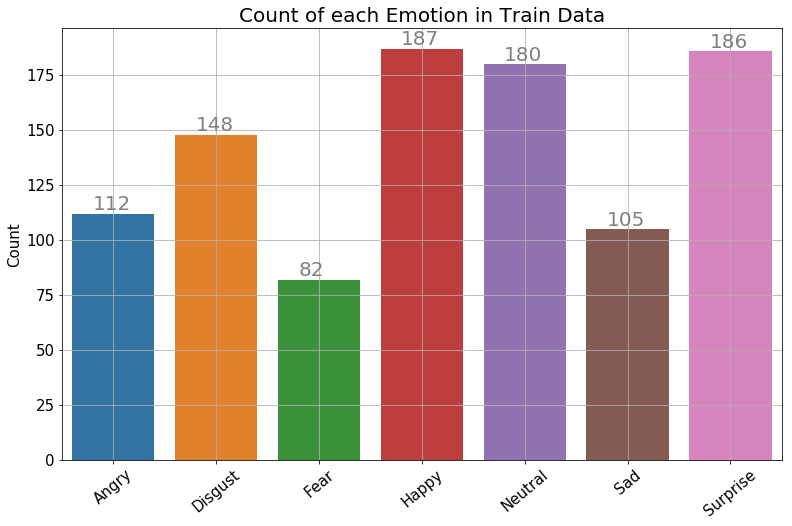

Number of training data points in class Happy = 187(18.7%)
Number of training data points in class Surprise = 186(18.6%)
Number of training data points in class Neutral = 180(18.0%)
Number of training data points in class Disgust = 148(14.8%)
Number of training data points in class Angry = 112(11.2%)
Number of training data points in class Sad = 105(10.5%)
Number of training data points in class Fear = 82(8.2%)
--------------------------------------------------------------------------------


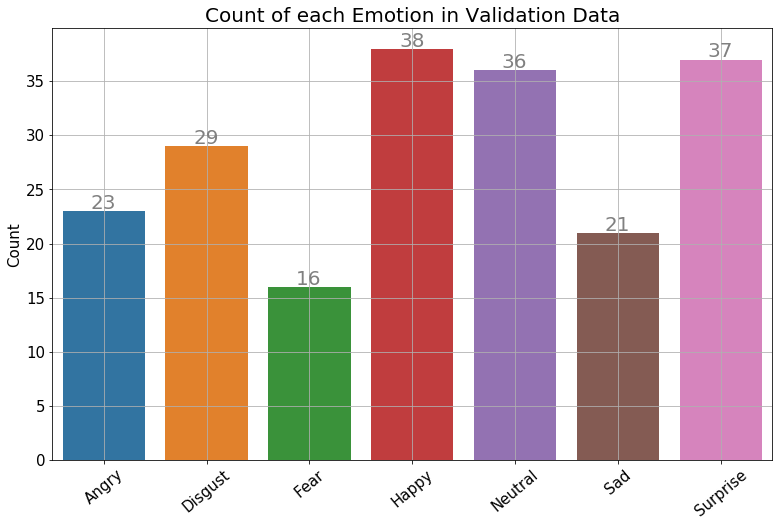

Number of training data points in class Happy = 38(19.0%)
Number of training data points in class Surprise = 37(18.5%)
Number of training data points in class Neutral = 36(18.0%)
Number of training data points in class Disgust = 29(14.5%)
Number of training data points in class Angry = 23(11.5%)
Number of training data points in class Sad = 21(10.5%)
Number of training data points in class Fear = 16(8.0%)
--------------------------------------------------------------------------------


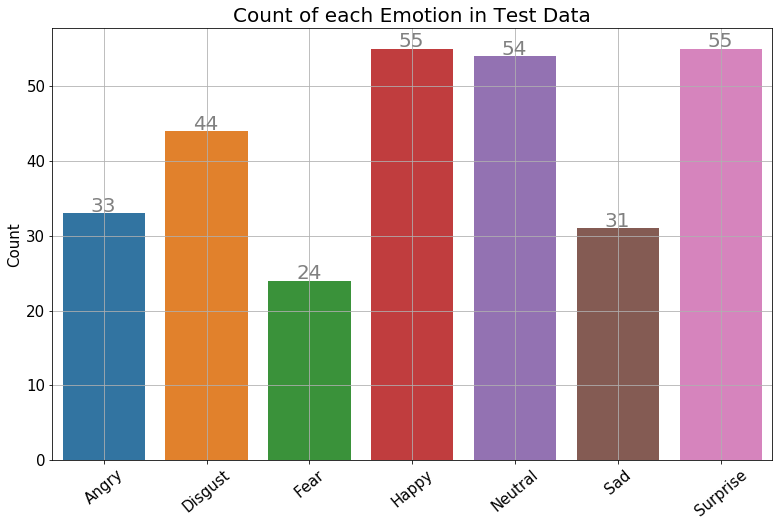

Number of training data points in class Happy = 55(18.5811%)
Number of training data points in class Surprise = 55(18.5811%)
Number of training data points in class Neutral = 54(18.2432%)
Number of training data points in class Disgust = 44(14.8649%)
Number of training data points in class Angry = 33(11.1486%)
Number of training data points in class Sad = 31(10.473%)
Number of training data points in class Fear = 24(8.1081%)


In [365]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_test.shape[0])*100), 4))+"%)")

## 4. Pre-Processing Human Images

### 4.1 Converting all the images to grayscale and save them

In [47]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        img = cv2.imread(os.path.join(path1, path2))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1, path2), gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [48]:
convt_to_gray(df_human_train)

Total number of images converted and saved = 1000


In [49]:
convt_to_gray(df_human_cv)

Total number of images converted and saved = 200


In [50]:
convt_to_gray(df_human_test)

Total number of images converted and saved = 296


### 4.2 Detecting face in image using HAAR then crop it then resize then save the image

In [94]:
#detect the face in image using HAAR cascade then crop it then resize it and finally save it.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
#download this xml file from link: https://github.com/opencv/opencv/tree/master/data/haarcascades.
def face_det_crop_resize(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]  #cropping the face in image
        cv2.imwrite(img_path, cv2.resize(face_clip, (350, 350)))  #resizing image then saving it

In [96]:
for i, d in df_human_train.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [97]:
for i, d in df_human_cv.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [98]:
for i, d in df_human_test.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

## 5. Reading the Data of Animated Images

### Angry

In [14]:
anime_angry = glob.glob("../Data/Animated/Angry/*.png")
print("Number of images in Angry emotion = "+str(len(anime_angry)))

Number of images in Angry emotion = 9169


In [16]:
anime_angry_folderName = [str(i.split("\\")[0])+"/" for i in anime_angry]
anime_angry_imageName = [str(i.split("\\")[1]) for i in anime_angry]
anime_angry_emotion = [["Angry"]*len(anime_angry)][0]
anime_angry_label = [1]*len(anime_angry)

len(anime_angry_folderName), len(anime_angry_imageName), len(anime_angry_emotion), len(anime_angry_label)

(9169, 9169, 9169, 9169)

In [17]:
df_angry = pd.DataFrame()
df_angry["folderName"] = anime_angry_folderName
df_angry["imageName"] = anime_angry_imageName
df_angry["Emotion"] = anime_angry_emotion
df_angry["Labels"] = anime_angry_label
df_angry.head()

folderName           imageName Emotion  Labels
0  ../Data/Animated/Angry/     aia_anger_1.png   Angry       1
1  ../Data/Animated/Angry/    aia_anger_10.png   Angry       1
2  ../Data/Animated/Angry/   aia_anger_100.png   Angry       1
3  ../Data/Animated/Angry/  aia_anger_1000.png   Angry       1
4  ../Data/Animated/Angry/  aia_anger_1001.png   Angry       1

In [25]:
df_angry = df_angry.sample(frac = 1.0) #shuffling dataframe
df_angry_reduced = df_angry.sample(n = 1300)  #taking only 1300 random images
df_angry_reduced.shape

(1300, 4)

In [39]:
#removing all the extra images from storage
df_angry_reducedIndx = df_angry_reduced.index
count = 0
for i, d in df_angry.iterrows():
    if i not in df_angry_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 7896


### Disgust

In [42]:
anime_disgust = glob.glob("../Data/Animated/Disgust/*.png")
print("Number of images in Disgust emotion = "+str(len(anime_disgust)))

Number of images in Disgust emotion = 8571


In [43]:
anime_disgust_folderName = [str(i.split("\\")[0])+"/" for i in anime_disgust]
anime_disgust_imageName = [str(i.split("\\")[1]) for i in anime_disgust]
anime_disgust_emotion = [["Disgust"]*len(anime_disgust)][0]
anime_disgust_label = [2]*len(anime_disgust)

len(anime_disgust_folderName), len(anime_disgust_imageName), len(anime_disgust_emotion), len(anime_disgust_label)

(8571, 8571, 8571, 8571)

In [44]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = anime_disgust_folderName
df_disgust["imageName"] = anime_disgust_imageName
df_disgust["Emotion"] = anime_disgust_emotion
df_disgust["Labels"] = anime_disgust_label
df_disgust.head()

folderName             imageName  Emotion  Labels
0  ../Data/Animated/Disgust/     aia_disgust_1.png  Disgust       2
1  ../Data/Animated/Disgust/    aia_disgust_10.png  Disgust       2
2  ../Data/Animated/Disgust/   aia_disgust_100.png  Disgust       2
3  ../Data/Animated/Disgust/  aia_disgust_1000.png  Disgust       2
4  ../Data/Animated/Disgust/  aia_disgust_1001.png  Disgust       2

In [46]:
df_disgust = df_disgust.sample(frac = 1.0) #shuffling dataframe
df_disgust_reduced = df_disgust.sample(n = 1300)  #taking only 1300 random images
df_disgust_reduced.shape

(1300, 4)

In [47]:
#removing all the extra images from storage
df_disgust_reducedIndx = df_disgust_reduced.index
count = 0
for i, d in df_disgust.iterrows():
    if i not in df_disgust_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 7271


### Fear

In [48]:
anime_fear = glob.glob("../Data/Animated/Fear/*.png")
print("Number of images in Fear emotion = "+str(len(anime_fear)))

Number of images in Fear emotion = 7419


In [50]:
anime_fear_folderName = [str(i.split("\\")[0])+"/" for i in anime_fear]
anime_fear_imageName = [str(i.split("\\")[1]) for i in anime_fear]
anime_fear_emotion = [["Fear"]*len(anime_fear)][0]
anime_fear_label = [3]*len(anime_fear)

len(anime_fear_folderName), len(anime_fear_imageName), len(anime_fear_emotion), len(anime_fear_label)

(7419, 7419, 7419, 7419)

In [51]:
df_fear = pd.DataFrame()
df_fear["folderName"] = anime_fear_folderName
df_fear["imageName"] = anime_fear_imageName
df_fear["Emotion"] = anime_fear_emotion
df_fear["Labels"] = anime_fear_label
df_fear.head()

folderName          imageName Emotion  Labels
0  ../Data/Animated/Fear/     aia_fear_1.png    Fear       3
1  ../Data/Animated/Fear/    aia_fear_10.png    Fear       3
2  ../Data/Animated/Fear/   aia_fear_100.png    Fear       3
3  ../Data/Animated/Fear/  aia_fear_1000.png    Fear       3
4  ../Data/Animated/Fear/  aia_fear_1001.png    Fear       3

In [52]:
df_fear = df_fear.sample(frac = 1.0) #shuffling dataframe
df_fear_reduced = df_fear.sample(n = 1300)  #taking only 1300 random images
df_fear_reduced.shape

(1300, 4)

In [53]:
#removing all the extra images from storage
df_fear_reducedIndx = df_fear_reduced.index
count = 0
for i, d in df_fear.iterrows():
    if i not in df_fear_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 6119


### Happy

In [90]:
anime_happy = glob.glob("../Data/Animated/Happy/*.png")
print("Number of images in Happy emotion = "+str(len(anime_happy)))

Number of images in Happy emotion = 7330


In [91]:
anime_happy_folderName = [str(i.split("\\")[0])+"/" for i in anime_happy]
anime_happy_imageName = [str(i.split("\\")[1]) for i in anime_happy]
anime_happy_emotion = [["Happy"]*len(anime_happy)][0]
anime_happy_label = [4]*len(anime_happy)

len(anime_happy_folderName), len(anime_happy_imageName), len(anime_happy_emotion), len(anime_happy_label)

(7330, 7330, 7330, 7330)

In [92]:
df_happy = pd.DataFrame()
df_happy["folderName"] = anime_happy_folderName
df_happy["imageName"] = anime_happy_imageName
df_happy["Emotion"] = anime_happy_emotion
df_happy["Labels"] = anime_happy_label
df_happy.head()

folderName         imageName Emotion  Labels
0  ../Data/Animated/Happy/     aia_joy_1.png   Happy       4
1  ../Data/Animated/Happy/    aia_joy_10.png   Happy       4
2  ../Data/Animated/Happy/   aia_joy_100.png   Happy       4
3  ../Data/Animated/Happy/  aia_joy_1000.png   Happy       4
4  ../Data/Animated/Happy/  aia_joy_1001.png   Happy       4

In [93]:
df_happy = df_happy.sample(frac = 1.0) #shuffling dataframe
df_happy_reduced = df_happy.sample(n = 1300)  #taking only 1300 random images
df_happy_reduced.shape

(1300, 4)

In [94]:
#removing all the extra images from storage
df_happy_reducedIndx = df_happy_reduced.index
count = 0
for i, d in df_happy.iterrows():
    if i not in df_happy_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 6030


### Neutral

In [95]:
anime_neutral = glob.glob("../Data/Animated/Neutral/*.png")
print("Number of images in Neutral emotion = "+str(len(anime_neutral)))

Number of images in Neutral emotion = 6939


In [96]:
anime_neutral_folderName = [str(i.split("\\")[0])+"/" for i in anime_neutral]
anime_neutral_imageName = [str(i.split("\\")[1]) for i in anime_neutral]
anime_neutral_emotion = [["Neutral"]*len(anime_neutral)][0]
anime_neutral_label = [5]*len(anime_neutral)

len(anime_neutral_folderName), len(anime_neutral_imageName), len(anime_neutral_emotion), len(anime_neutral_label)

(6939, 6939, 6939, 6939)

In [97]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = anime_neutral_folderName
df_neutral["imageName"] = anime_neutral_imageName
df_neutral["Emotion"] = anime_neutral_emotion
df_neutral["Labels"] = anime_neutral_label
df_neutral.head()

folderName             imageName  Emotion  Labels
0  ../Data/Animated/Neutral/     aia_neutral_1.png  Neutral       5
1  ../Data/Animated/Neutral/    aia_neutral_10.png  Neutral       5
2  ../Data/Animated/Neutral/   aia_neutral_100.png  Neutral       5
3  ../Data/Animated/Neutral/  aia_neutral_1000.png  Neutral       5
4  ../Data/Animated/Neutral/  aia_neutral_1001.png  Neutral       5

In [98]:
df_neutral = df_neutral.sample(frac = 1.0) #shuffling dataframe
df_neutral_reduced = df_neutral.sample(n = 1300)  #taking only 1300 random images
df_neutral_reduced.shape

(1300, 4)

In [99]:
#removing all the extra images from storage
df_neutral_reducedIndx = df_neutral_reduced.index
count = 0
for i, d in df_neutral.iterrows():
    if i not in df_neutral_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 5639


### Sad

In [100]:
anime_sad = glob.glob("../Data/Animated/Sad/*.png")
print("Number of images in Sad emotion = "+str(len(anime_sad)))

Number of images in Sad emotion = 7627


In [101]:
anime_sad_folderName = [str(i.split("\\")[0])+"/" for i in anime_sad]
anime_sad_imageName = [str(i.split("\\")[1]) for i in anime_sad]
anime_sad_emotion = [["Sad"]*len(anime_sad)][0]
anime_sad_label = [6]*len(anime_sad)

len(anime_sad_folderName), len(anime_sad_imageName), len(anime_sad_emotion), len(anime_sad_label)

(7627, 7627, 7627, 7627)

In [102]:
df_sad = pd.DataFrame()
df_sad["folderName"] = anime_sad_folderName
df_sad["imageName"] = anime_sad_imageName
df_sad["Emotion"] = anime_sad_emotion
df_sad["Labels"] = anime_sad_label
df_sad.head()

folderName             imageName Emotion  Labels
0  ../Data/Animated/Sad/     aia_sadness_1.png     Sad       6
1  ../Data/Animated/Sad/    aia_sadness_10.png     Sad       6
2  ../Data/Animated/Sad/   aia_sadness_100.png     Sad       6
3  ../Data/Animated/Sad/  aia_sadness_1000.png     Sad       6
4  ../Data/Animated/Sad/  aia_sadness_1001.png     Sad       6

In [103]:
df_sad = df_sad.sample(frac = 1.0) #shuffling dataframe
df_sad_reduced = df_sad.sample(n = 1300)  #taking only 1300 random images
df_sad_reduced.shape

(1300, 4)

In [104]:
#removing all the extra images from storage
df_sad_reducedIndx = df_sad_reduced.index
count = 0
for i, d in df_sad.iterrows():
    if i not in df_sad_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 6327


### Surprise

In [105]:
anime_surprise = glob.glob("../Data/Animated/Surprise/*.png")
print("Number of images in Surprise emotion = "+str(len(anime_surprise)))

Number of images in Surprise emotion = 8712


In [106]:
anime_surprise_folderName = [str(i.split("\\")[0])+"/" for i in anime_surprise]
anime_surprise_imageName = [str(i.split("\\")[1]) for i in anime_surprise]
anime_surprise_emotion = [["Surprise"]*len(anime_surprise)][0]
anime_surprise_label = [7]*len(anime_surprise)

len(anime_surprise_folderName), len(anime_surprise_imageName), len(anime_surprise_emotion), len(anime_surprise_label)

(8712, 8712, 8712, 8712)

In [107]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = anime_surprise_folderName
df_surprise["imageName"] = anime_surprise_imageName
df_surprise["Emotion"] = anime_surprise_emotion
df_surprise["Labels"] = anime_surprise_label
df_surprise.head()

folderName              imageName   Emotion  Labels
0  ../Data/Animated/Surprise/     aia_surprise_1.png  Surprise       7
1  ../Data/Animated/Surprise/    aia_surprise_10.png  Surprise       7
2  ../Data/Animated/Surprise/   aia_surprise_100.png  Surprise       7
3  ../Data/Animated/Surprise/  aia_surprise_1000.png  Surprise       7
4  ../Data/Animated/Surprise/  aia_surprise_1001.png  Surprise       7

In [108]:
df_surprise = df_surprise.sample(frac = 1.0) #shuffling dataframe
df_surprise_reduced = df_surprise.sample(n = 1300)  #taking only 1300 random images
df_surprise_reduced.shape

(1300, 4)

In [109]:
#removing all the extra images from storage
df_surprise_reducedIndx = df_surprise_reduced.index
count = 0
for i, d in df_surprise.iterrows():
    if i not in df_surprise_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 7412


### Concatenating all Datafames

In [110]:
frames = [df_angry_reduced, df_disgust_reduced, df_fear_reduced, df_happy_reduced, df_neutral_reduced, df_sad_reduced, df_surprise_reduced]
Final_Animated = pd.concat(frames)
Final_Animated.shape

(9100, 4)

In [111]:
Final_Animated.reset_index(inplace = True, drop = True)
Final_Animated = Final_Animated.sample(frac = 1.0)   #shuffling the dataframe
Final_Animated.reset_index(inplace = True, drop = True)
Final_Animated.head()

folderName                imageName   Emotion  Labels
0   ../Data/Animated/Neutral/      ray_neutral_512.png   Neutral       5
1  ../Data/Animated/Surprise/   jules_surprise_552.png  Surprise       7
2   ../Data/Animated/Neutral/  malcolm_neutral_533.png   Neutral       5
3   ../Data/Animated/Neutral/     mery_neutral_488.png   Neutral       5
4     ../Data/Animated/Happy/       bonnie_joy_985.png     Happy       4

## 6. Train, CV and Test Split for Animated Images

In [152]:
df_anime_train_data, df_anime_test = train_test_split(Final_Animated, stratify=Final_Animated["Labels"], test_size = 0.131868)
df_anime_train, df_anime_cv = train_test_split(df_anime_train_data, stratify=df_anime_train_data["Labels"], test_size = 0.088607)
df_anime_train.shape, df_anime_cv.shape, df_anime_test.shape

((7200, 4), (700, 4), (1200, 4))

In [153]:
df_anime_train.reset_index(inplace = True, drop = True)
df_anime_train.to_pickle("../Data/Dataframes/Animated/df_anime_train.pkl")

df_anime_cv.reset_index(inplace = True, drop = True)
df_anime_cv.to_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")

df_anime_test.reset_index(inplace = True, drop = True)
df_anime_test.to_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")

In [8]:
df_anime_train = pd.read_pickle("../Data/Dataframes/Animated/df_anime_train.pkl")
df_anime_train.head()

folderName                imageName   Emotion  Labels
0      ../Data/Animated/Fear/          mery_fear_7.png      Fear       3
1  ../Data/Animated/Surprise/     aia_surprise_143.png  Surprise       7
2   ../Data/Animated/Neutral/   bonnie_neutral_741.png   Neutral       5
3   ../Data/Animated/Disgust/  bonnie_disgust_1562.png   Disgust       2
4   ../Data/Animated/Disgust/      aia_disgust_861.png   Disgust       2

In [9]:
df_anime_train.shape

(7200, 4)

In [10]:
df_anime_cv = pd.read_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")
df_anime_cv.head()

folderName                imageName   Emotion  Labels
0     ../Data/Animated/Happy/          ray_joy_771.png     Happy       4
1     ../Data/Animated/Angry/     jules_anger_1269.png     Angry       1
2   ../Data/Animated/Disgust/  bonnie_disgust_2023.png   Disgust       2
3  ../Data/Animated/Surprise/   jules_surprise_860.png  Surprise       7
4     ../Data/Animated/Angry/        ray_anger_648.png     Angry       1

In [11]:
df_anime_cv.shape

(700, 4)

In [12]:
df_anime_test = pd.read_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")
df_anime_test.head()

folderName              imageName   Emotion  Labels
0       ../Data/Animated/Sad/  jules_sadness_347.png       Sad       6
1      ../Data/Animated/Fear/   malcolm_fear_434.png      Fear       3
2     ../Data/Animated/Angry/     mery_anger_897.png     Angry       1
3  ../Data/Animated/Surprise/   aia_surprise_550.png  Surprise       7
4      ../Data/Animated/Fear/      mery_fear_636.png      Fear       3

In [13]:
df_anime_test.shape

(1200, 4)

## 7. Analysing Data of Animated Images
### Distribution of class labels in Train, CV and Test

In [160]:
df_temp_train = df_anime_train.sort_values(by = "Labels", inplace = False)
df_temp_cv = df_anime_cv.sort_values(by = "Labels", inplace = False)
df_temp_test = df_anime_test.sort_values(by = "Labels", inplace = False)

TrainData_distribution = df_anime_train["Emotion"].value_counts().sort_index()
CVData_distribution = df_anime_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_anime_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)

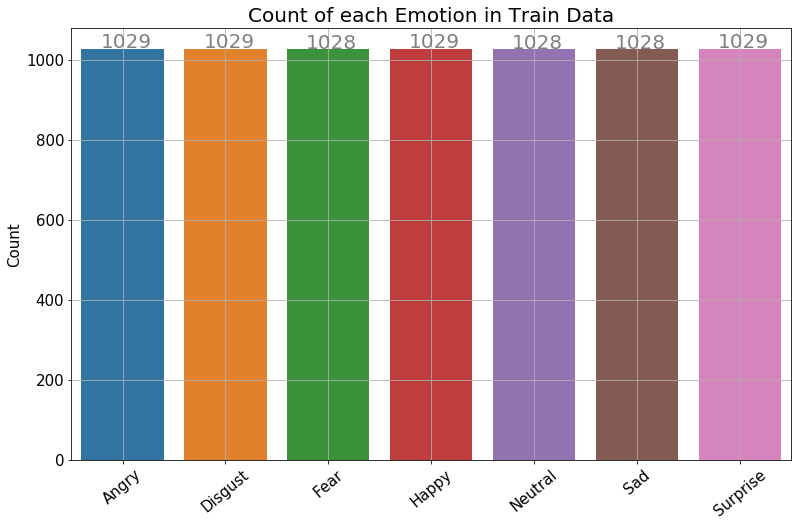

Number of training data points in class Angry = 1029(14.2917%)
Number of training data points in class Disgust = 1029(14.2917%)
Number of training data points in class Happy = 1029(14.2917%)
Number of training data points in class Surprise = 1029(14.2917%)
Number of training data points in class Fear = 1028(14.2778%)
Number of training data points in class Neutral = 1028(14.2778%)
Number of training data points in class Sad = 1028(14.2778%)
--------------------------------------------------------------------------------


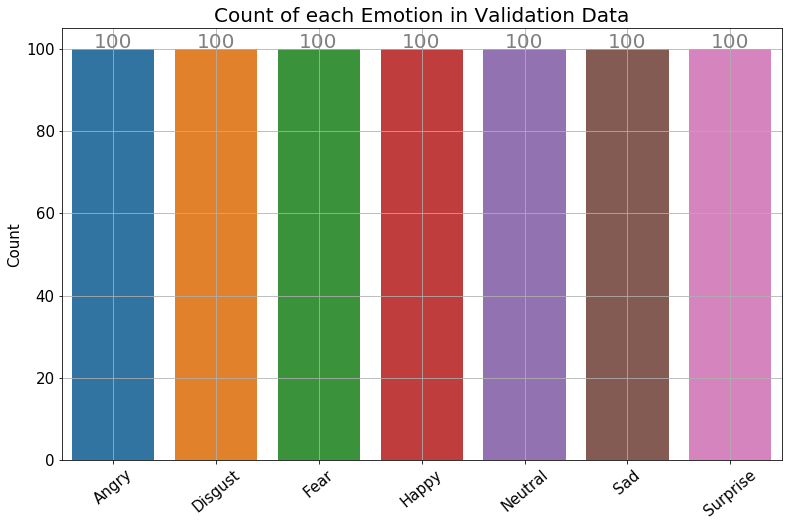

Number of training data points in class Angry = 100(14.2857%)
Number of training data points in class Disgust = 100(14.2857%)
Number of training data points in class Fear = 100(14.2857%)
Number of training data points in class Happy = 100(14.2857%)
Number of training data points in class Neutral = 100(14.2857%)
Number of training data points in class Sad = 100(14.2857%)
Number of training data points in class Surprise = 100(14.2857%)
--------------------------------------------------------------------------------


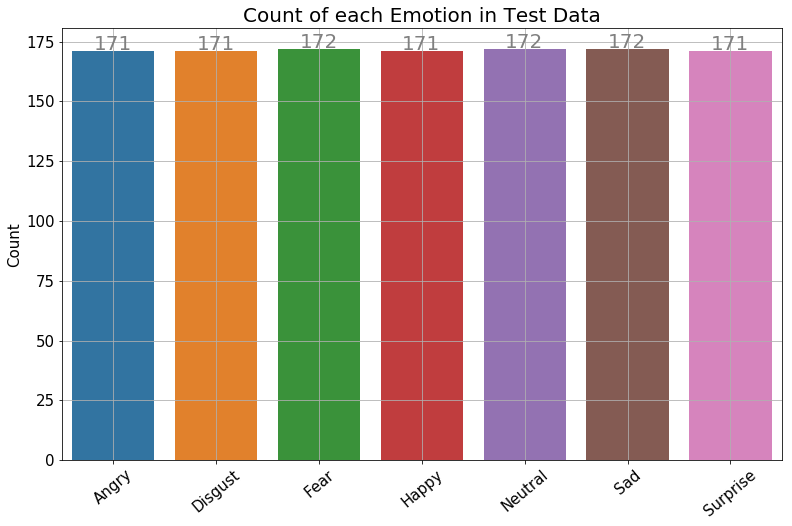

Number of training data points in class Fear = 172(14.3333%)
Number of training data points in class Neutral = 172(14.3333%)
Number of training data points in class Sad = 172(14.3333%)
Number of training data points in class Angry = 171(14.25%)
Number of training data points in class Disgust = 171(14.25%)
Number of training data points in class Happy = 171(14.25%)
Number of training data points in class Surprise = 171(14.25%)


In [166]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.185, y = i.get_height()+1.6, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.21, y = i.get_height()+0.3, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.21, y = i.get_height()+0.3, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_test.shape[0])*100), 4))+"%)")

## 8. Pre-Processing Animated Images

### 8.1 Converting all the images to grayscale and save them

In [169]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        img = cv2.imread(os.path.join(path1, path2))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1, path2), gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [170]:
convt_to_gray(df_anime_train)

Total number of images converted and saved = 7200


In [171]:
convt_to_gray(df_anime_cv)

Total number of images converted and saved = 700


In [172]:
convt_to_gray(df_anime_test)

Total number of images converted and saved = 1200


### 8.2 Crop the image then resize them then save them.

In [330]:
def change_image(df):
    count = 0
    for i, d in df.iterrows():
        img = cv2.imread(os.path.join(d["folderName"], d["imageName"]))
        face_clip = img[40:240, 35:225]         #cropping the face in image
        face_resized = cv2.resize(face_clip, (350, 350))
        cv2.imwrite(os.path.join(d["folderName"], d["imageName"]), face_resized) #resizing and saving the image
        count += 1
    print("Total number of images cropped and resized = {}".format(count))

In [331]:
change_image(df_anime_train)

Total number of images cropped and resized = 7200


In [332]:
change_image(df_anime_cv)

Total number of images cropped and resized = 700


In [333]:
change_image(df_anime_test)

Total number of images cropped and resized = 1200


## 9. Combining train data of both Animated and Human images

Remember, that here we have combined only the train images of both human and animated so that we can train our model on both human and animated images. However, we have kept CV and test images of both human and animated separate so that we can cross validation our results on both human and animated images separately. At the same time we will also be able to test the efficiency of our model separately on human and animated images. By this we will get to know that how well our model is performing on human and animated images separately.

In [14]:
frames = [df_human_train, df_anime_train]
combined_train = pd.concat(frames)
combined_train.shape

(8200, 4)

In [16]:
combined_train = combined_train.sample(frac = 1.0)  #shuffling the dataframe
combined_train.reset_index(inplace = True, drop = True)
combined_train.to_pickle("../Data/Dataframes/combined_train.pkl")

## 10. Creating bottleneck features from VGG-16 model. Here, we are using Transfer learning.

In [2]:
Train_Combined = pd.read_pickle("../Data/Dataframes/combined_train.pkl")
CV_Humans = pd.read_pickle("../Data/Dataframes/Human/df_human_cv.pkl")
CV_Animated = pd.read_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")
Test_Humans = pd.read_pickle("../Data/Dataframes/Human/df_human_test.pkl")
Test_Animated = pd.read_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")

Train_Combined.shape, CV_Humans.shape, CV_Animated.shape, Test_Humans.shape, Test_Animated.shape

((8200, 4), (200, 4), (700, 4), (296, 4), (1200, 4))

In [5]:
TrainCombined_batch_pointer = 0
CVHumans_batch_pointer = 0
CVAnimated_batch_pointer = 0
TestHumans_batch_pointer = 0
TestAnimated_batch_pointer = 0

### 10.1 Bottleneck features for CombinedTrain Data

In [4]:
TrainCombined_Labels = pd.get_dummies(Train_Combined["Labels"]).as_matrix()
TrainCombined_Labels.shape

C:\Users\GauravP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(8200, 7)

In [5]:
def loadCombinedTrainBatch(batch_size):
    global TrainCombined_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["folderName"]
        path2 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TrainCombined_Labels[TrainCombined_batch_pointer + i]) #appending corresponding labels
        
    TrainCombined_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [1]:
#creating bottleneck features for train data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"
batch_size = 10
for i in range(int(len(Train_Combined)/batch_size)):
    x, y = loadCombinedTrainBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

### 10.2 Bottleneck features for CV Human

In [57]:
CVHumans_Labels = pd.get_dummies(CV_Humans["Labels"]).as_matrix()
CVHumans_Labels.shape

C:\Users\GauravP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(200, 7)

In [58]:
def loadCVHumanBatch(batch_size):
    global CVHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = CV_Humans.iloc[CVHumans_batch_pointer + i]["folderName"]
        path2 = CV_Humans.iloc[CVHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(CVHumans_Labels[CVHumans_batch_pointer + i]) #appending corresponding labels
        
    CVHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [2]:
#creating bottleneck features for CV Human data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"
batch_size = 10
for i in range(int(len(CV_Humans)/batch_size)):
    x, y = loadCVHumanBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

### 10.3 Bottleneck features for CV Animated

In [63]:
CVAnimated_Labels = pd.get_dummies(CV_Animated["Labels"]).as_matrix()
CVAnimated_Labels.shape

C:\Users\GauravP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(700, 7)

In [64]:
def loadCVAnimatedBatch(batch_size):
    global CVAnimated_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = CV_Animated.iloc[CVAnimated_batch_pointer + i]["folderName"]
        path2 = CV_Animated.iloc[CVAnimated_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(CVAnimated_Labels[CVAnimated_batch_pointer + i]) #appending corresponding labels
        
    CVAnimated_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [3]:
#creating bottleneck features for CV Animated data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CVAnimated/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CVAnimated_Labels/"
batch_size = 10
for i in range(int(len(CV_Animated)/batch_size)):
    x, y = loadCVAnimatedBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

### 10.4 Bottleneck Features for Test Human Data

In [66]:
TestHuman_Labels = pd.get_dummies(Test_Humans["Labels"]).as_matrix()
TestHuman_Labels.shape

C:\Users\GauravP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(296, 7)

In [67]:
def loadTestHumansBatch(batch_size):
    global TestHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Test_Humans.iloc[TestHumans_batch_pointer + i]["folderName"]
        path2 = Test_Humans.iloc[TestHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestHuman_Labels[TestHumans_batch_pointer + i]) #appending corresponding labels
        
    TestHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [4]:
#creating bottleneck features for Test Humans data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_TestHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/TestHumans_Labels/"
batch_size = 10
for i in range(int(len(Test_Humans)/batch_size)):
    x, y = loadTestHumansBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

leftover_points = len(Test_Humans) - TestHumans_batch_pointer
x, y = loadTestHumansBatch(leftover_points)
np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(int(len(Test_Humans)/batch_size) + 1)), y)
bottleneck_features = model.predict(x)
np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(int(len(Test_Humans)/batch_size) + 1)), bottleneck_features)

### 10.5 Bottleneck Features for Test Animated Data

In [6]:
TestAnimated_Labels = pd.get_dummies(Test_Animated["Labels"]).as_matrix()
TestAnimated_Labels.shape

C:\Users\GauravP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(1200, 7)

In [7]:
def loadTestAnimatedBatch(batch_size):
    global TestAnimated_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Test_Animated.iloc[TestAnimated_batch_pointer + i]["folderName"]
        path2 = Test_Animated.iloc[TestAnimated_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestAnimated_Labels[TestAnimated_batch_pointer + i]) #appending corresponding labels
        
    TestAnimated_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [5]:
#creating bottleneck features for Test Animated data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_TestAnimated/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/TestAnimated_Labels/"
batch_size = 10
for i in range(int(len(Test_Animated)/batch_size)):
    x, y = loadTestAnimatedBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

## 11. Modelling & Training

In [3]:
no_of_classes = 7

In [30]:
#model architecture
def model(input_shape):
    model = Sequential()
        
    model.add(Dense(512, activation='relu', input_dim = input_shape))
    model.add(Dropout(0.1))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim = no_of_classes, activation='softmax')) 
    
    return model

In [6]:
#training the model
SAVEDIR_COMB_TRAIN = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_COMB_TRAIN_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"

SAVEDIR_CV_HUMANS = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_CV_HUMANS_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"

SAVEDIR_CV_ANIME = "../Data/Bottleneck_Features/Bottleneck_CVAnimated/"
SAVEDIR_CV_ANIME_LABELS =  "../Data/Bottleneck_Features/CVAnimated_Labels/"

SAVER = "../Data/Model_Save/"

input_shape = 10*10*512   #this is the shape of bottleneck feature of each image which comes after passing the image through VGG-16

model = model(input_shape)
# model.load_weights(os.path.join(SAVER, "model.h5"))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

epochs = 20
batch_size = 10
step = 0
combTrain_bottleneck_files = int(len(Train_Combined) / batch_size)
CVHuman_bottleneck_files = int(len(CV_Humans) / batch_size)
CVAnime_bottleneck_files = int(len(CV_Animated) / batch_size)
epoch_number, CombTrain_loss, CombTrain_acc, CVHuman_loss, CVHuman_acc, CVAnime_loss, CVAnime_acc = [], [], [], [], [], [], []

for epoch in range(epochs):
    avg_epoch_CombTr_loss, avg_epoch_CombTr_acc, avg_epoch_CVHum_loss, avg_epoch_CVHum_acc, avg_epoch_CVAnime_loss, avg_epoch_CVAnime_acc = 0, 0, 0, 0, 0, 0
    epoch_number.append(epoch + 1)
    
    for i in range(combTrain_bottleneck_files):
        
        step += 1
        
        #loading batch of train bottleneck features for training MLP.
        X_CombTrain_load = np.load(os.path.join(SAVEDIR_COMB_TRAIN, "bottleneck_{}.npy".format(i+1)))
        X_CombTrain = X_CombTrain_load.reshape(X_CombTrain_load.shape[0], X_CombTrain_load.shape[1]*X_CombTrain_load.shape[2]*X_CombTrain_load.shape[3])
        Y_CombTrain = np.load(os.path.join(SAVEDIR_COMB_TRAIN_LABELS, "bottleneck_labels_{}.npy".format(i+1)))
        
        #loading batch of Human CV bottleneck features for cross-validation.
        X_CVHuman_load = np.load(os.path.join(SAVEDIR_CV_HUMANS, "bottleneck_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        X_CVHuman = X_CVHuman_load.reshape(X_CVHuman_load.shape[0], X_CVHuman_load.shape[1]*X_CVHuman_load.shape[2]*X_CVHuman_load.shape[3])
        Y_CVHuman = np.load(os.path.join(SAVEDIR_CV_HUMANS_LABELS, "bottleneck_labels_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        
        #loading batch of animated CV bottleneck features for cross-validation.
        X_CVAnime_load = np.load(os.path.join(SAVEDIR_CV_ANIME, "bottleneck_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        X_CVAnime = X_CVAnime_load.reshape(X_CVAnime_load.shape[0], X_CVAnime_load.shape[1]*X_CVAnime_load.shape[2]*X_CVAnime_load.shape[3])
        Y_CVAnime = np.load(os.path.join(SAVEDIR_CV_ANIME_LABELS, "bottleneck_labels_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        
        CombTrain_Loss, CombTrain_Accuracy = model.train_on_batch(X_CombTrain, Y_CombTrain) #train the model on batch
        CVHuman_Loss, CVHuman_Accuracy = model.test_on_batch(X_CVHuman, Y_CVHuman) #cross validate the model on CV Human batch
        CVAnime_Loss, CVAnime_Accuracy = model.test_on_batch(X_CVAnime, Y_CVAnime) #cross validate the model on CV Animated batch
        
        print("Epoch: {}, Step: {}, CombTr_Loss: {}, CombTr_Acc: {}, CVHum_Loss: {}, CVHum_Acc: {}, CVAni_Loss: {}, CVAni_Acc: {}".format(epoch+1, step, np.round(float(CombTrain_Loss), 2), np.round(float(CombTrain_Accuracy), 2), np.round(float(CVHuman_Loss), 2), np.round(float(CVHuman_Accuracy), 2), np.round(float(CVAnime_Loss), 2), np.round(float(CVAnime_Accuracy), 2)))
        
        avg_epoch_CombTr_loss += CombTrain_Loss / combTrain_bottleneck_files
        avg_epoch_CombTr_acc += CombTrain_Accuracy / combTrain_bottleneck_files
        avg_epoch_CVHum_loss += CVHuman_Loss / combTrain_bottleneck_files
        avg_epoch_CVHum_acc += CVHuman_Accuracy / combTrain_bottleneck_files
        avg_epoch_CVAnime_loss += CVAnime_Loss / combTrain_bottleneck_files
        avg_epoch_CVAnime_acc += CVAnime_Accuracy / combTrain_bottleneck_files
        
    print("Avg_CombTrain_Loss: {}, Avg_CombTrain_Acc: {}, Avg_CVHum_Loss: {}, Avg_CVHum_Acc: {}, Avg_CVAnime_Loss: {}, Avg_CVAnime_Acc: {}".format(np.round(float(avg_epoch_CombTr_loss), 2), np.round(float(avg_epoch_CombTr_acc), 2), np.round(float(avg_epoch_CVHum_loss), 2), np.round(float(avg_epoch_CVHum_acc), 2), np.round(float(avg_epoch_CVAnime_loss), 2), np.round(float(avg_epoch_CVAnime_acc), 2)))

    CombTrain_loss.append(avg_epoch_CombTr_loss)
    CombTrain_acc.append(avg_epoch_CombTr_acc)
    CVHuman_loss.append(avg_epoch_CVHum_loss)
    CVHuman_acc.append(avg_epoch_CVHum_acc)
    CVAnime_loss.append(avg_epoch_CVAnime_loss)
    CVAnime_acc.append(avg_epoch_CVAnime_acc)
    
    model.save(os.path.join(SAVER, "model.h5"))  #saving the model on each epoc
    model.save_weights(os.path.join(SAVER, "model_weights.h5")) #saving the weights of model on each epoch
    print("Model and weights saved at epoch {}".format(epoch + 1))
          
log_frame = pd.DataFrame(columns = ["Epoch", "Comb_Train_Loss", "Comb_Train_Accuracy", "CVHuman_Loss", "CVHuman_Accuracy", "CVAnime_Loss", "CVAnime_Accuracy"])
log_frame["Epoch"] = epoch_number
log_frame["Comb_Train_Loss"] = CombTrain_loss
log_frame["Comb_Train_Accuracy"] = CombTrain_acc
log_frame["CVHuman_Loss"] = CVHuman_loss
log_frame["CVHuman_Accuracy"] = CVHuman_acc
log_frame["CVAnime_Loss"] = CVAnime_loss
log_frame["CVAnime_Accuracy"] = CVAnime_acc
log_frame.to_csv("../Data/Logs/Log.csv", index = False)

In [40]:
log = pd.read_csv("../Data/Logs/Log.csv")
log

Epoch  Comb_Train_Loss  Comb_Train_Accuracy  CVHuman_Loss  \
0       1             2.45                 0.17          2.89   
1       2             2.19                 0.21          2.25   
2       3             1.98                 0.25          1.97   
3       4             1.78                 0.31          1.77   
4       5             1.63                 0.35          1.65   
5       6             1.55                 0.41          1.44   
6       7             1.32                 0.51          1.34   
7       8             1.11                 0.57          1.22   
8       9             0.95                 0.61          1.20   
9      10             0.77                 0.69          1.10   
10     11             0.65                 0.75          1.09   
11     12             0.44                 0.81          1.03   
12     13             0.21                 0.89          0.89   
13     14             0.11                 0.93          0.77   
14     15             0.07                 0.97          0.65   
15     16             0.04                 0.99          0.50   
16     17             0.03                 0.99          0.54   
17     18             0.04                 0.99          0.49   
18     19             0.03                 0.99          0.49   
19     20             0.04                 0.99          0.46   

    CVHuman_Accuracy  CVAnime_Loss  CVAnime_Accuracy  
0               0.15          2.21              0.19  
1               0.21          1.55              0.34  
2               0.25          1.09              0.51  
3               0.29          0.70              0.71  
4               0.35          0.40              0.85  
5               0.48          0.22              0.91  
6               0.50          0.11              0.93  
7               0.54          0.07              0.97  
8               0.55          0.04              0.98  
9               0.57          0.01              0.99  
10              0.60          0.01              0.99  
11              0.61          0.01              0.99  
12              0.69          0.01              1.00  
13              0.75          0.00              1.00  
14              0.83          0.00              1.00  
15              0.85          0.00              1.00  
16              0.84          0.00              1.00  
17              0.86          0.00              1.00  
18              0.87          0.00              1.00  
19              0.87          0.00              1.00

In [41]:
def plotting(epoch, train_loss, CVHuman_loss, CVAnimated_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Train")
    axes.plot(epoch, CVHuman_loss, color = 'blue', label = "CV_Human")
    axes.plot(epoch, CVAnimated_loss, color = 'green', label = "CV_Animated")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

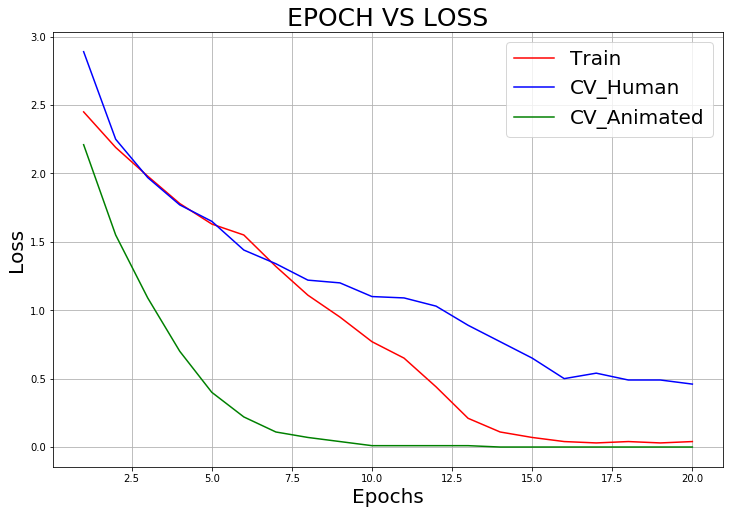

In [44]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Loss"]), list(log["CVHuman_Loss"]), list(log["CVAnime_Loss"]), "EPOCH VS LOSS")

In [47]:
def plotting(epoch, train_acc, CVHuman_acc, CVAnimated_acc, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_acc, color = 'red', label = "Train_Accuracy")
    axes.plot(epoch, CVHuman_acc, color = 'blue', label = "CV_Human_Accuracy")
    axes.plot(epoch, CVAnimated_acc, color = 'green', label = "CV_Animated_Accuracy")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Accuracy", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

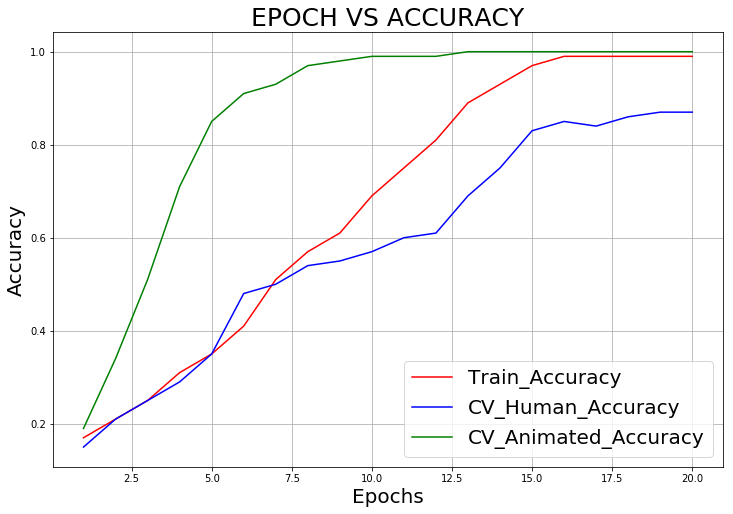

In [49]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Accuracy"]), list(log["CVHuman_Accuracy"]), list(log["CVAnime_Accuracy"]), "EPOCH VS ACCURACY")

## 12. Checking Test Accuracy

In [3]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    # confusionMatx = [[1, 2],
    #                  [3, 4]]
    # confusionMatx.T = [[1, 3],
    #                   [2, 4]]
    # confusionMatx.sum(axis = 1)  axis=0 corresponds to columns and axis=1 corresponds to rows in two diamensional array
    # confusionMatx.sum(axix =1) = [[3, 7]]
    # (confusionMatx.T)/(confusionMatx.sum(axis=1)) = [[1/3, 3/7]
    #                                                  [2/3, 4/7]]

    # (confusionMatx.T)/(confusionMatx.sum(axis=1)).T = [[1/3, 2/3]
    #                                                    [3/7, 4/7]]
    # sum of row elements = 1
    
    labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

### Test Data of Human Images

In [4]:
model = load_model("../Data/Model_Save/model.h5")
predicted_labels = []
true_labels = []
batch_size = 10
total_files = int(len(Test_Humans) / batch_size) + 2 #here, I have added 2 because there are 30 files in Test_Humans
for i in range(1, total_files, 1):
    img_load = np.load("../Data/Bottleneck_Features/Bottleneck_TestHumans/bottleneck_{}.npy".format(i))
    img_label = np.load("../Data/Bottleneck_Features/TestHumans_Labels/bottleneck_labels_{}.npy".format(i))
    img_bundle = img_load.reshape(img_load.shape[0], img_load.shape[1]*img_load.shape[2]*img_load.shape[3])
    for j in range(img_bundle.shape[0]):
        img = img_bundle[j]
        img = img.reshape(1, img_bundle.shape[1])
        pred = model.predict(img)
        predicted_labels.append(pred[0].argmax())
        true_labels.append(img_label[j].argmax())
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Human Test Data = {}%".format(np.round(float(acc*100), 2)))

Accuracy on Human Test Data = 82.43%


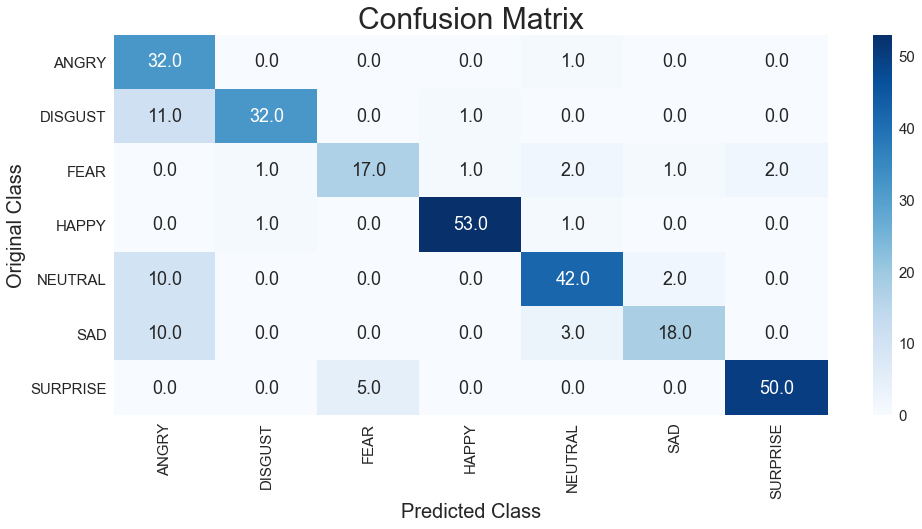

-----------------------------------------------------------------------------------------------------------------------------


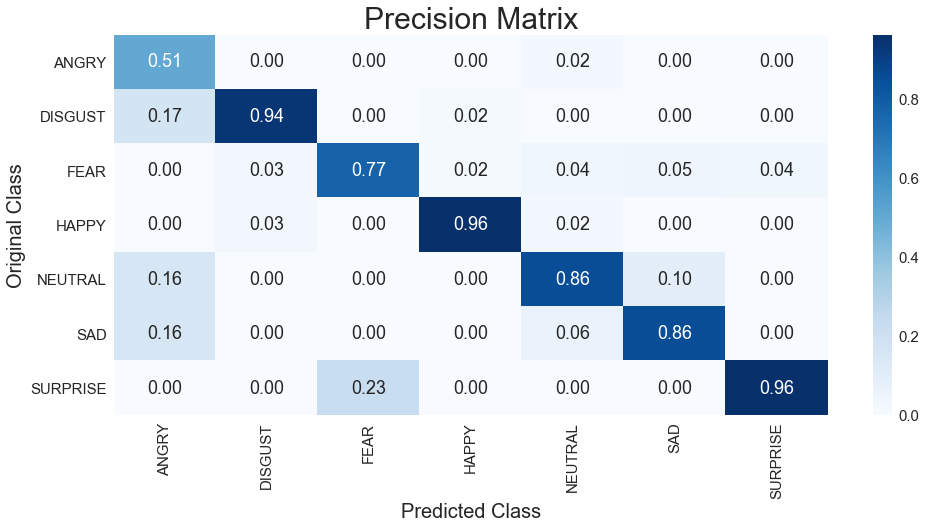

-----------------------------------------------------------------------------------------------------------------------------


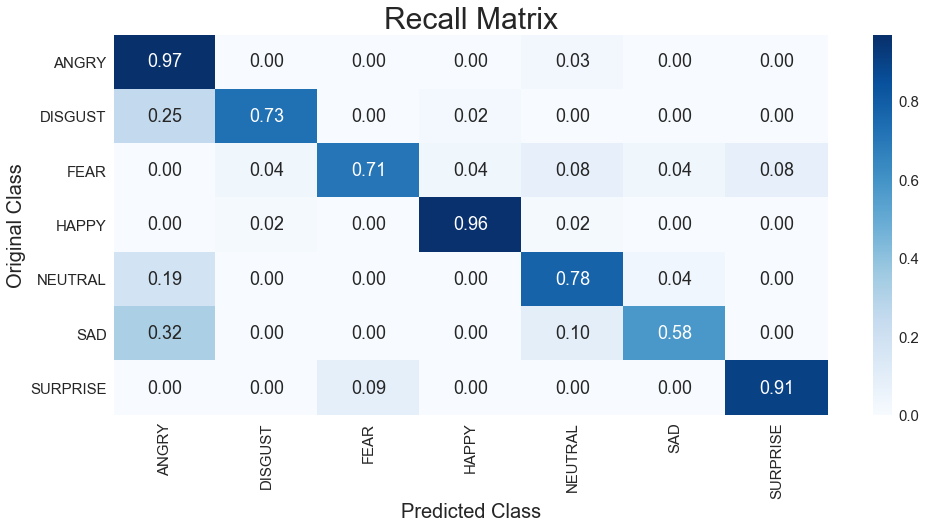

In [5]:
print_confusionMatrix(true_labels, predicted_labels)

### Test Data of Animated Images

In [6]:
model = load_model("../Data/Model_Save/model.h5")
predicted_labels = []
true_labels = []
batch_size = 10
total_files = int(len(Test_Animated) / batch_size) + 1
for i in range(1, total_files, 1):
    img_load = np.load("../Data/Bottleneck_Features/Bottleneck_TestAnimated/bottleneck_{}.npy".format(i))
    img_label = np.load("../Data/Bottleneck_Features/TestAnimated_Labels/bottleneck_labels_{}.npy".format(i))
    img_bundle = img_load.reshape(img_load.shape[0], img_load.shape[1]*img_load.shape[2]*img_load.shape[3])
    for j in range(img_bundle.shape[0]):
        img = img_bundle[j]
        img = img.reshape(1, img_bundle.shape[1])
        pred = model.predict(img)
        predicted_labels.append(pred[0].argmax())
        true_labels.append(img_label[j].argmax())
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Animated Test Data = {}%".format(np.round(float(acc*100), 2)))

Accuracy on Animated Test Data = 100.0%


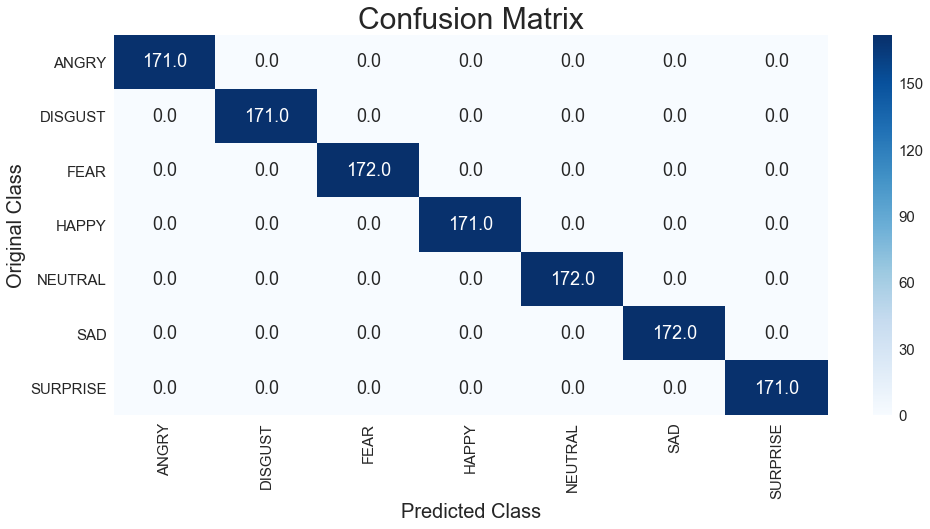

-----------------------------------------------------------------------------------------------------------------------------


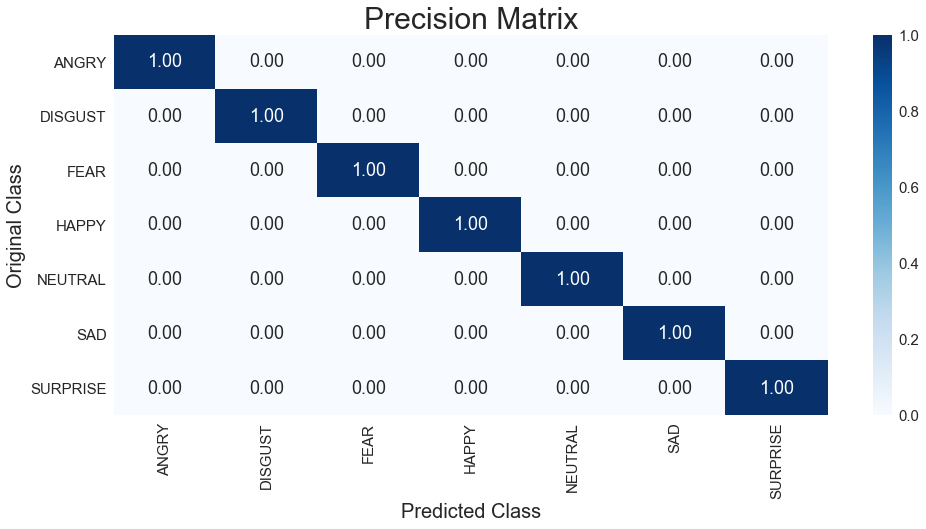

-----------------------------------------------------------------------------------------------------------------------------


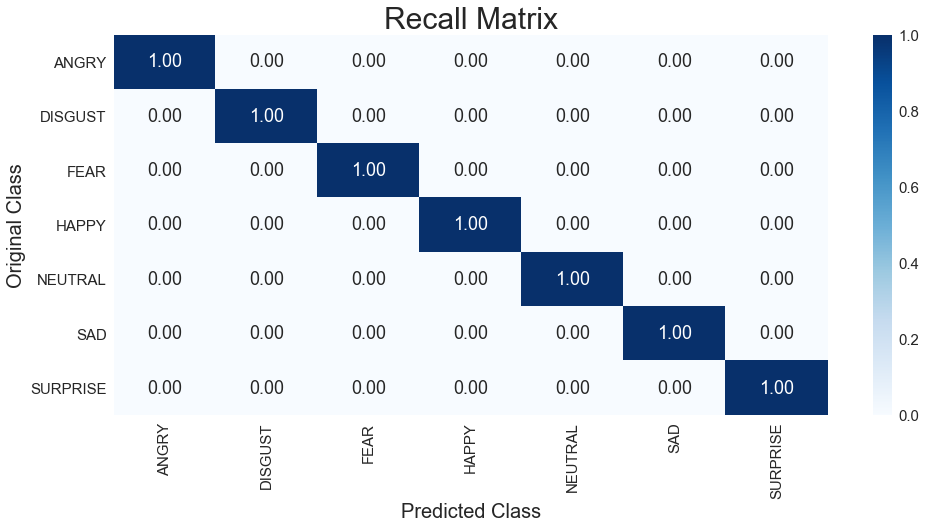

In [7]:
print_confusionMatrix(true_labels, predicted_labels)

## 13. Testing on Real World with Still Images

In [8]:
# Now for testing the model on real world images we have to follow all of the same steps which we have done on our training, CV
# and test images. Like here we have to first pre-preocess our images then create its VGG-16 bottleneck features then pass those 
# bottleneck features through our own MLP model for prediction.
# Steps are as follows:
# 1. Read the image, convert it to grayscale and save it.
# 2. Read that grayscale saved image, the detect face in it using HAAR cascade.
# 3. Crop the image to the detected face and resize it to 350*350 and save the image.
# 4. Read that processed cropped-resized image, then reshape it and normalize it.
# 5. Then feed that image to VGG-16 and create bottleneck features of that image and then reshape it.
# 6. Then use our own model for final prediction of expression.

In [2]:
import  cv2
import numpy as np
from keras.models import load_model
from keras.applications import VGG16
EMOTION_DICT = {1:"ANGRY", 2:"DISGUST", 3:"FEAR", 4:"HAPPY", 5:"NEUTRAL", 6:"SAD", 7:"SURPRISE"}
model_VGG = VGG16(weights='imagenet', include_top=False)
model_top = load_model("./model.h5")

C:\Users\Naveen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def make_prediction(path):
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml') 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    
    #read the processed image then make prediction and display the result
    read_image = cv2.imread(path)
    read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
    read_image_final = read_image/255.0  #normalizing the image
    VGG_Pred = model_VGG.predict(read_image_final)  #creating bottleneck features of image using VGG-16.
    VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
    top_pred = model_top.predict(VGG_Pred)  #making prediction from our own model.
    emotion_label = top_pred[0].argmax() + 1
    print("Predicted Expression Probabilities")
    print("ANGRY: {}\nDISGUST: {}\nFEAR: {}\nHAPPY: {}\nNEUTRAL: {}\nSAD: {}\nSURPRISE: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6]))
    print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))

### ANGRY

### Correct Result

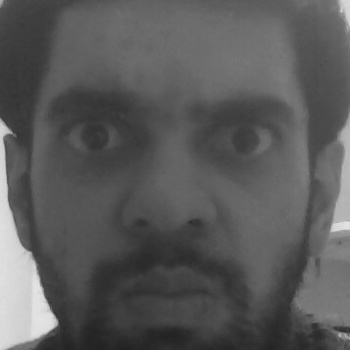

In [17]:
Image.open("../Data/Test_Images/Angry_1.JPG")

In [20]:
make_prediction("../Data/Test_Images/Angry_1.JPG")

Predicted Expression Probabilities
ANGRY: 0.7257885932922363
DISGUST: 0.009196578525006771
FEAR: 0.00836753286421299
HAPPY: 0.0022135425824671984
NEUTRAL: 0.13011476397514343
SAD: 0.12406197190284729
SURPRISE: 0.00025709287729114294


Dominant Probability = ANGRY: 0.7257886


### Correct Result

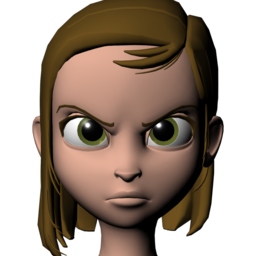

In [21]:
Image.open("../Data/Test_Images/Angry_2.png")

In [22]:
make_prediction("../Data/Test_Images/Angry_2.png")

Predicted Expression Probabilities
ANGRY: 0.9992955923080444
DISGUST: 0.0002044820721494034
FEAR: 9.613921065465547e-06
HAPPY: 4.289282514946535e-06
NEUTRAL: 2.7359423256712034e-05
SAD: 0.00045741876238025725
SURPRISE: 1.1059050848416518e-06


Dominant Probability = ANGRY: 0.9992956


### DISGUST

### Incorrect Result

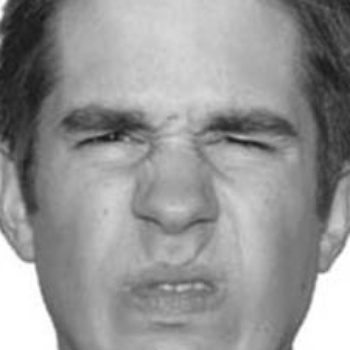

In [21]:
Image.open("../Data/Test_Images/Disgust_1.jpg")

In [20]:
make_prediction("../Data/Test_Images/Disgust_1.jpg")

Predicted Expression Probabilities
ANGRY: 0.6820868849754333
DISGUST: 0.3178218901157379
FEAR: 1.021714297166909e-06
HAPPY: 2.2017935407347977e-05
NEUTRAL: 5.1129391067661345e-06
SAD: 6.297716026892886e-05
SURPRISE: 8.2167117554377e-10


Dominant Probability = ANGRY: 0.6820869


### Correct Result

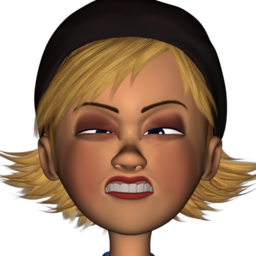

In [31]:
Image.open("../Data/Test_Images/Disgust_2.png")

In [32]:
make_prediction("../Data/Test_Images/Disgust_2.png")

Predicted Expression Probabilities
ANGRY: 5.865476282451709e-07
DISGUST: 0.9999994039535522
FEAR: 1.0832363651902543e-12
HAPPY: 4.008695597690348e-10
NEUTRAL: 2.2506696506496837e-10
SAD: 2.0564636660225233e-09
SURPRISE: 1.620196828804911e-14


Dominant Probability = DISGUST: 0.9999994


### FEAR

### Correct Result

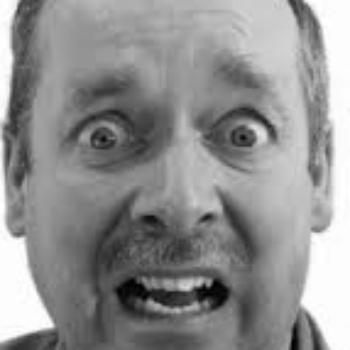

In [17]:
Image.open("../Data/Test_Images/Fear_1.jpg")

In [16]:
make_prediction("../Data/Test_Images/Fear_1.jpg")

Predicted Expression Probabilities
ANGRY: 0.0014409959549084306
DISGUST: 0.0011888426961377263
FEAR: 0.8639399409294128
HAPPY: 0.0012069966178387403
NEUTRAL: 0.040269557386636734
SAD: 0.07585041970014572
SURPRISE: 0.01610312983393669


Dominant Probability = FEAR: 0.86393994


### Correct Result

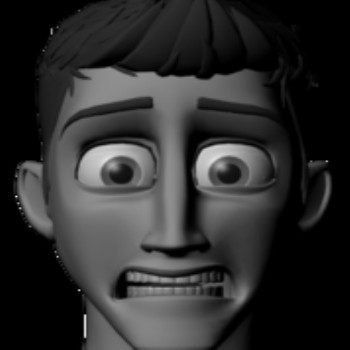

In [6]:
Image.open("../Data/Test_Images/Fear_2.png")

In [4]:
make_prediction("../Data/Test_Images/Fear_2.png")

Predicted Expression Probabilities
ANGRY: 6.208167633303674e-07
DISGUST: 2.3438562948285835e-06
FEAR: 0.9993552565574646
HAPPY: 6.2351973610930145e-06
NEUTRAL: 0.00013250419578980654
SAD: 0.00022573411115445197
SURPRISE: 0.0002773168671410531


Dominant Probability = FEAR: 0.99935526


### HAPPY

### Correct Result

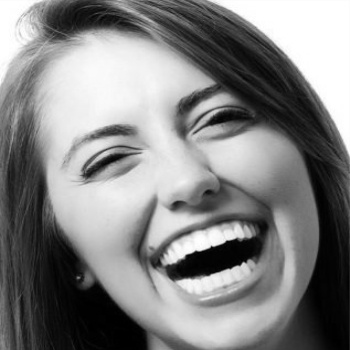

In [14]:
Image.open("../Data/Test_Images/Happy_1.jpg")

In [23]:
make_prediction("../Data/Test_Images/Happy_1.jpg")

Predicted Expression Probabilities
ANGRY: 6.918347025930416e-06
DISGUST: 0.05933113768696785
FEAR: 3.4089982364093885e-05
HAPPY: 0.9405853152275085
NEUTRAL: 3.5700180887943134e-05
SAD: 6.779935574741103e-06
SURPRISE: 2.4646456608934386e-07


Dominant Probability = HAPPY: 0.9405853


### Correct Result

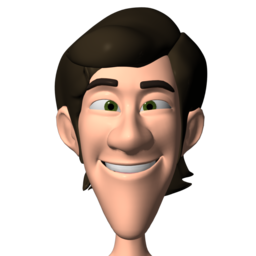

In [22]:
Image.open("../Data/Test_Images/Happy_2.png")

In [24]:
make_prediction("../Data/Test_Images/Happy_2.png")

Predicted Expression Probabilities
ANGRY: 1.0575328590264887e-12
DISGUST: 1.3165504242351744e-06
FEAR: 4.739036896239668e-08
HAPPY: 0.9999984502792358
NEUTRAL: 1.801792421929349e-07
SAD: 9.010955176469437e-11
SURPRISE: 3.67006064427855e-10


Dominant Probability = HAPPY: 0.99999845


### Neutral

### Correct Result

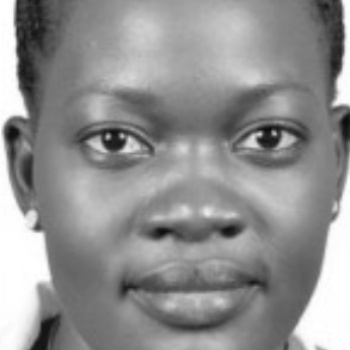

In [4]:
Image.open("../Data/Test_Images/Neutral_1.jpg")

In [3]:
make_prediction("../Data/Test_Images/Neutral_6.jpg")

Predicted Expression Probabilities
ANGRY: 0.056531112641096115
DISGUST: 0.00017849539290182292
FEAR: 0.00038363729254342616
HAPPY: 0.00012379800318740308
NEUTRAL: 0.9326807260513306
SAD: 0.009718898683786392
SURPRISE: 0.00038327727816067636


Dominant Probability = NEUTRAL: 0.9326807


### Sad

### Correct Prediction

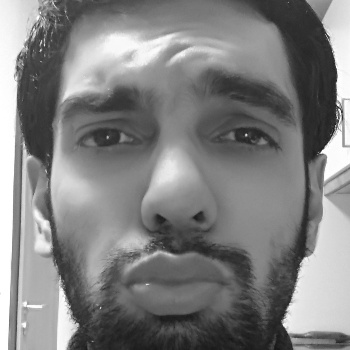

In [9]:
Image.open("../Data/Test_Images/Sad_1.jpg")

In [7]:
make_prediction("../Data/Test_Images/Sad_1.jpg")

Predicted Expression Probabilities
ANGRY: 0.3095955550670624
DISGUST: 0.01769070141017437
FEAR: 0.07686590403318405
HAPPY: 0.006198391318321228
NEUTRAL: 0.1944163292646408
SAD: 0.39325907826423645
SURPRISE: 0.001974012004211545


Dominant Probability = SAD: 0.39325908


### Correct Prediction

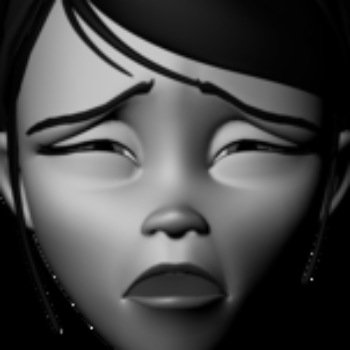

In [11]:
Image.open("../Data/Test_Images/Sad_2.png")

In [10]:
make_prediction("../Data/Test_Images/Sad_2.png")

Predicted Expression Probabilities
ANGRY: 1.8063846596305666e-07
DISGUST: 2.109569777530851e-06
FEAR: 3.813128923724207e-09
HAPPY: 2.0874833979445118e-12
NEUTRAL: 1.9764388525800314e-06
SAD: 0.9999957084655762
SURPRISE: 7.052668671292395e-09


Dominant Probability = SAD: 0.9999957


### Surprise

### Correct Prediction

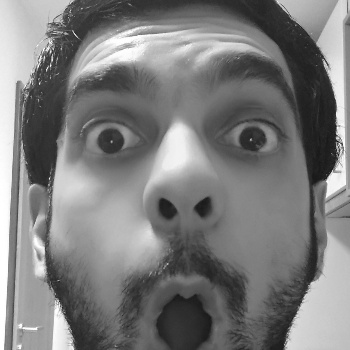

In [13]:
Image.open("../Data/Test_Images/Surprise_1.jpg")

In [12]:
make_prediction("../Data/Test_Images/Surprise_1.jpg")

Predicted Expression Probabilities
ANGRY: 3.6574178921000566e-06
DISGUST: 2.397854359514895e-08
FEAR: 0.015543382614850998
HAPPY: 1.7507695702079218e-06
NEUTRAL: 9.84826692729257e-05
SAD: 8.507548045599833e-06
SURPRISE: 0.9843442440032959


Dominant Probability = SURPRISE: 0.98434424


### Correct Prediction

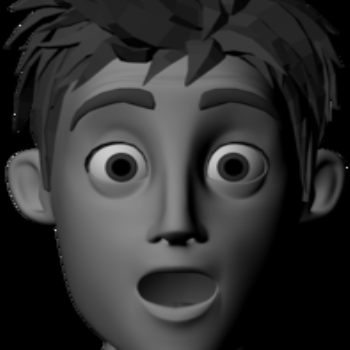

In [16]:
Image.open("../Data/Test_Images/Surprise_2.png")

In [15]:
make_prediction("../Data/Test_Images/Surprise_2.png")

Predicted Expression Probabilities
ANGRY: 8.131757420204444e-12
DISGUST: 2.8135717226093065e-14
FEAR: 1.1461297333426046e-07
HAPPY: 3.016933647348452e-10
NEUTRAL: 4.252813934346733e-10
SAD: 2.2675119160792123e-12
SURPRISE: 0.9999998807907104


Dominant Probability = SURPRISE: 0.9999999


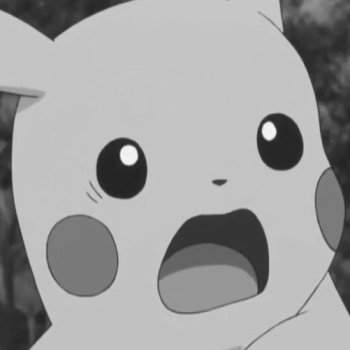

In [7]:
Image.open("../Data/Test_Images/Surprise_3.jpg")

In [8]:
make_prediction("../Data/Test_Images/Surprise_3.jpg")

Predicted Expression Probabilities
ANGRY: 7.466517854481936e-05
DISGUST: 8.049021005263057e-09
FEAR: 0.0035154588986188173
HAPPY: 1.8760174498311244e-06
NEUTRAL: 0.00012389293988235295
SAD: 1.6487249013152905e-05
SURPRISE: 0.9962676167488098


Dominant Probability = SURPRISE: 0.9962676


In [337]:
# cnt_correct = 0
# cnt_incorrect = 0
# for i, d in df_anime_test.iterrows():
#     img_path = os.path.join(d["folderName"], d["imageName"])
#     im_size = cv2.imread(img_path).shape
#     if im_size == (350, 350, 3):
#         cnt_correct += 1
#     else:
#         cnt_incorrect += 1
# print("Correct = "+str(cnt_correct))
# print("incorrect = "+str(cnt_incorrect))

In [123]:
# a = Train_Combined
# randInt = np.random.randint(0, a.shape[0], size = (1))[0]
# emotion = a["Emotion"][randInt]
# label = a["Labels"][randInt]
# path1 = a["folderName"][randInt]
# path2 = a["imageName"][randInt]
# img = Image.open(os.path.join(path1, path2))
# img

In [124]:
# print(emotion)
# print(label)

In [41]:
# count_present = 0
# count_absent = 0
# for i, d in df_angry_reduced.iterrows():
#     path1 = d["folderName"]
#     path2 = d["imageName"]
#     if os.path.isfile(os.path.join(path1, path2)):
#         count_present += 1
#     else:
#         count_absent += 1
# print("Count present = "+str(count_present))
# print("Count absent = "+str(count_absent))